<a href="https://colab.research.google.com/github/inesNeji/project1/blob/main/AirQualityMonitoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Exemple pour charger un fichier CSV
dataframe = pd.read_csv("AirQuality.csv")
dataframe.head()
# Afficher des informations sur le DataFrame
dataframe.info()

# Descriptif statistique des données
dataframe.describe()


In [ ]:
from flask import Flask, request, jsonify
import pandas as pd

app = Flask(__name__)

# Chargez vos données à partir du fichier CSV
data = pd.read_csv('AirQuality.csv')

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json(force=True)

    # Supposons que votre modèle attend 'input' dans le JSON de la requête
    # et que 'input' est une liste de valeurs
    input_data = data['input']

    # Faites vos prédictions directement avec les données du fichier CSV
    # (ceci est un exemple, ajustez-le selon vos besoins)
    prediction = make_prediction(input_data)

    # Renvoyez la prédiction en JSON
    return jsonify({'prediction': prediction})

def make_prediction(input_data):
    # Implémentez la logique de prédiction ici en utilisant les données du fichier CSV
    # Ceci est un exemple simple, ajustez-le selon vos besoins
    # (par exemple, vous pourriez utiliser un modèle ML ici)
    return {'result': 'Your prediction logic here'}

if __name__ == '__main__':
    app.run(debug=True)


FileNotFoundError: [Errno 2] No such file or directory: 'AirQuality.csv'

In [ ]:
!ls



sample_data


In [ ]:
import pandas as pd

# Exemple pour charger un fichier CSV
dataframe = pd.read_csv("AirQuality.csv")
dataframe.head()
# Afficher des informations sur le DataFrame
dataframe.info()

# Descriptif statistique des données
dataframe.describe()


<class 'pandas.core.frame.DataFrame'>
MultiIndex: 9471 entries, ('10/03/2004;18.00.00;2', '6;1360;150;11', '9;1046;166;1056;113;1692;1268;13', '6;48', '9;0') to (';;;;;;;;;;;;;;;;', nan, nan, nan, nan)
Data columns (total 1 columns):
 #   Column                                                                                                                        Non-Null Count  Dtype 
---  ------                                                                                                                        --------------  ----- 
 0   Date;Time;CO(GT);PT08.S1(CO);NMHC(GT);C6H6(GT);PT08.S2(NMHC);NOx(GT);PT08.S3(NOx);NO2(GT);PT08.S4(NO2);PT08.S5(O3);T;RH;AH;;  6915 non-null   object
dtypes: object(1)
memory usage: 1.2+ MB


,Date;Time;CO(GT);PT08.S1(CO);NMHC(GT);C6H6(GT);PT08.S2(NMHC);NOx(GT);PT08.S3(NOx);NO2(GT);PT08.S4(NO2);PT08.S5(O3);T;RH;AH;;
count,6915
unique,4941
top,7487;;
freq,6


In [ ]:
# Supprimer les duplicatas
dataframe.drop_duplicates(inplace=True)

# Gérer les données manquantes
dataframe.dropna(inplace=True)  # ou remplir les données manquantes avec dataframe.fillna()


In [ ]:
dataframe.head()

,,,,,Date;Time;CO(GT);PT08.S1(CO);NMHC(GT);C6H6(GT);PT08.S2(NMHC);NOx(GT);PT08.S3(NOx);NO2(GT);PT08.S4(NO2);PT08.S5(O3);T;RH;AH;;
10/03/2004;18.00.00;2,6;1360;150;11,9;1046;166;1056;113;1692;1268;13,6;48,9;0,7578;;
10/03/2004;20.00.00;2,2;1402;88;9,0;939;131;1140;114;1555;1074;11,9;54,0;0,7502;;
10/03/2004;21.00.00;2,2;1376;80;9,2;948;172;1092;122;1584;1203;11,0;60,0;0,7867;;
10/03/2004;22.00.00;1,6;1272;51;6,5;836;131;1205;116;1490;1110;11,2;59,6;0,7888;;
10/03/2004;23.00.00;1,2;1197;38;4,7;750;89;1337;96;1393;949;11,2;59,2;0,7848;;


# Regression

Mean Squared Error: 2607.123466758125
Mean Absolute Error: 26.294595664515732
R-squared: 0.5587220470333925
Explained Variance Score: 0.5587430406181597


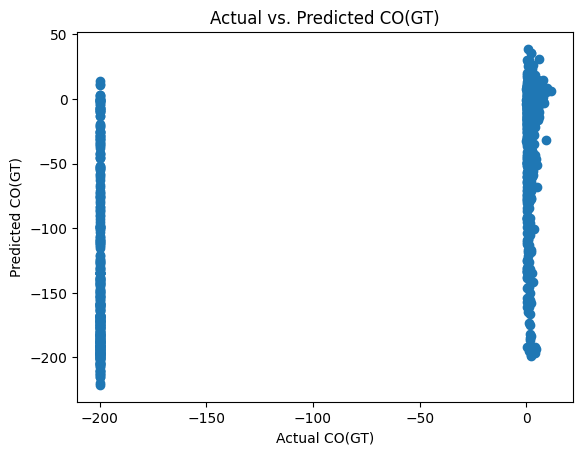

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
import matplotlib.pyplot as plt

# Load the dataset
file_path = "AirQuality.csv"
df = pd.read_csv(file_path, delimiter=';')

# Process the data
# Assuming 'CO(GT)' is the target variable, you can modify it accordingly
df['CO(GT)'] = pd.to_numeric(df['CO(GT)'].replace('NaN', np.nan).str.replace(',', '.'), errors='coerce')

# Convert object columns to numeric types
numeric_cols = ['C6H6(GT)', 'T', 'RH', 'AH']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Select features and target variable
features = ['PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']
target = 'CO(GT)'

# Drop rows with missing or non-numeric values in the target variable
df.dropna(subset=[target], inplace=True)

# Split the data into training and testing sets
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the XGBoost regressor
model = XGBRegressor()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
explained_var = explained_variance_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')
print(f'Explained Variance Score: {explained_var}')

# Plot actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual CO(GT)')
plt.ylabel('Predicted CO(GT)')
plt.title('Actual vs. Predicted CO(GT)')
plt.show()


In [ ]:
!unzip air-quality-data-set.zip

Archive:  air-quality-data-set.zip
  inflating: AirQuality.csv          


In [ ]:
!kaggle datasets download -d fedesoriano/air-quality-data-set

  0% 0.00/248k [00:00<?, ?B/s]
100% 248k/248k [00:00<00:00, 79.6MB/s]


In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle


In [ ]:
!mv kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json


# Classification

In [ ]:
# prompt: import svm

from sklearn import svm
clf = svm.LinearSVC()
clf.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `z

Accuracy: 0.9883905013192612
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.99      1.00      0.99      1873

    accuracy                           0.99      1895
   macro avg       0.49      0.50      0.50      1895
weighted avg       0.98      0.99      0.98      1895

Confusion Matrix:
[[   0   22]
 [   0 1873]]


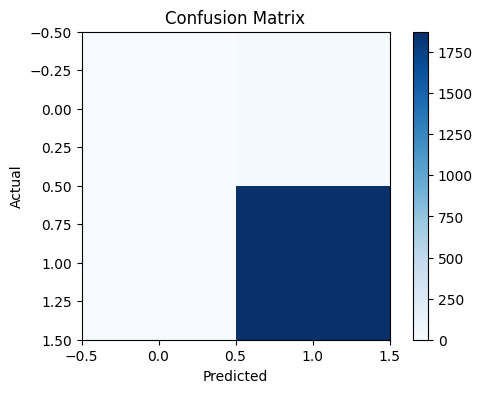

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load the dataset
file_path = "AirQuality.csv"
df = pd.read_csv(file_path, delimiter=';')

# Process the data
# Assuming 'CO(GT)' is the target variable, you can modify it accordingly
df['CO(GT)'] = pd.to_numeric(df['CO(GT)'].replace('NaN', np.nan).str.replace(',', '.'), errors='coerce')

# Convert object columns to numeric types
numeric_cols = ['C6H6(GT)', 'T', 'RH', 'AH']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Define a binary target variable: 1 for good air quality, 0 for not good
df['AirQuality'] = np.where(df['CO(GT)'] <= 100, 1, 0)  # Set a threshold based on your definition

# Select features and target variable
features = ['PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']
target = 'AirQuality'

# Drop rows with missing values in the target variable
df.dropna(subset=[target], inplace=True)

# Split the data into training and testing sets
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values
imputer = SimpleImputer()
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Create and train the Linear SVM classifier
clf = LinearSVC()
clf.fit(X_train_imputed, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test_imputed)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Classification Report and Confusion Matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
